In [23]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [24]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,metal_amount_mmol,ligand_amount_mmol,reductant_amount_mmol,sol1_vol_mL,solv2_vol_mL,time_min,temp_c,...,121,122,123,124,125,126,127,128,size_nm,g_factor*10^4.1
0,0,0,0,-0.454677,-0.189866,-0.196766,-0.120691,-0.523499,0.681196,-0.998532,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.06,0.000000
1,1,1,1,-0.454677,-0.189866,-0.196766,-0.100205,-0.523499,0.681196,-0.998532,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.757989
2,2,2,2,1.606371,0.030694,0.275068,-0.171905,-0.523499,-0.595993,-0.998532,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.583069
3,3,3,3,1.773936,0.045732,0.286496,-0.028504,-0.523499,-0.595993,-0.998532,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.37,0.000000
4,4,4,4,-0.454677,-0.189866,-0.196766,-0.120691,-0.523499,0.681196,-0.998532,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,197,197,-0.264770,-0.405413,-0.241391,-0.602108,-0.523499,0.216764,-0.175924,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.00,2.000000
198,198,198,198,0.573054,-0.204904,0.003505,-0.171905,-0.003814,-0.537939,-0.175924,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.05,15.000000
199,199,199,199,0.573054,-0.204904,0.003505,-0.171905,-0.003814,-0.537939,-0.175924,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.30,10.000000
200,200,200,200,0.573054,-0.330222,0.003505,-0.171905,-0.003814,-0.537939,-0.175924,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.05,7.000000


In [25]:
input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('g_factor*10^4.1')
input_col

['metal_amount_mmol',
 'ligand_amount_mmol',
 'reductant_amount_mmol',
 'sol1_vol_mL',
 'solv2_vol_mL',
 'time_min',
 'temp_c',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',


In [26]:
X = df[input_col]

Y = df['g_factor*10^4.1']

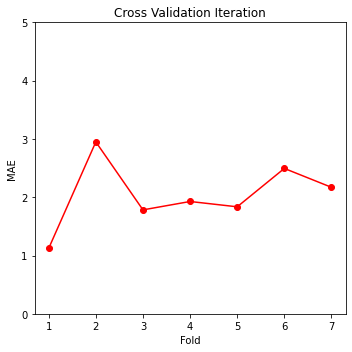

In [28]:
cv=5
fig,ax = plt.subplots(1, 1, figsize=(5,5))
n_splits=7
cv = KFold(n_splits=n_splits, random_state=45, shuffle=True)

#size
clf1=joblib.load('model_SO_ExtraTrees.joblib')
scores_size = cross_val_score(clf1, X, Y, cv=cv, scoring='neg_mean_absolute_error')
scores_size=-scores_size
ax.set(ylim=(0,5))
ax.plot(range(1,n_splits+1),scores_size,'ro-')
ax.set_title('Cross Validation Iteration')
ax.set(xlabel='Fold', ylabel='MAE')


fig.tight_layout()